### Random Forest Regression
##### (Ensemble Learning)

* Take multiple algorithms, or the same multiple times and put them together to make something more powerful than original
* Ensemble algorithms are more stable because any change to the data might affect just one of the DTs  (in this e.g.) rather than the entire forest

* Steps:
    1.  Pick at random K data points from the training set
    2.  Build the Decision Tree associated to these K data points (rather than everything in your dataset)
    3.  Choose the number Ntree of trees you want to build and repeat STEPS 1 & 2
    4.  For a new data point, make each one of your Ntree trees predict the value of Y to for the data point in question, and assign the new data point the average across all of the predicted Y values

* Real life simple example of ensemble: say there is a bunch of m&ms in a jar and you need to guess how many there are in order to win a prize. A good strategy to do so would be to wait around by the jar and have other people make their guesses (and you jot their guesses down), and once you have collected enough guesses from people, you just average them out (or take the median) and BOOM! statistically speaking, you are much more likely to have the correct guess of the number of m&ms

#### Implementation

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
# Splitting the dataset into the Training set and Test set - NOT necessary here
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [4]:
# Feature Scaling - NOT necessary here
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [5]:
# Fitting the Random Forest Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) #want 10 trees to start
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [11]:
# Predicting a new result
y_pred = regressor.predict(6.5)
print('y_pred: ' + str(y_pred))

y_pred: [ 167000.]


In [7]:
# Visualising the Random Forest Regression results - Will get same problem that we had while plotting decision tree model -> therefore, ignoring and going straight to higher resolution
"""
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
"""

"\nplt.scatter(X, y, color = 'red')\nplt.plot(X, regressor.predict(X), color = 'blue')\nplt.title('Truth or Bluff (Random Forest Regression Model)')\nplt.xlabel('Position level')\nplt.ylabel('Salary')\nplt.show()\n"

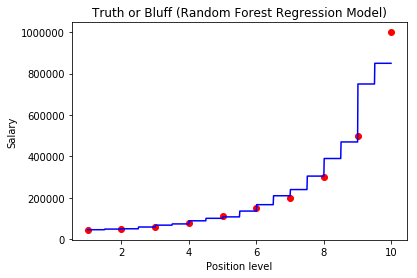

In [12]:
# Visualising the Random Forest Regression results (for higher resolution and smoother curve)
%matplotlib inline
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

* **NOTE**: the more trees you have doesn't mean you have more steps, it just means that more and more of the average of the DT votes will converge to the same average (aka the steps are better placed)

y_pred: [ 158300.]


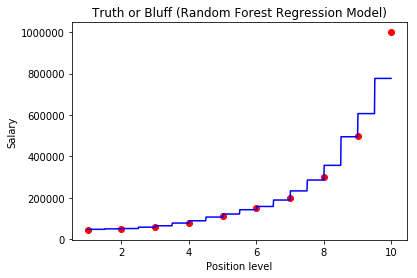

In [13]:
#increasing the number of trees
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) #want 10 trees to start
regressor.fit(X, y)
# Predicting a new result
y_pred = regressor.predict(6.5)
print('y_pred: ' + str(y_pred))
# Visualising the Random Forest Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

y_pred: [ 160333.33333333]


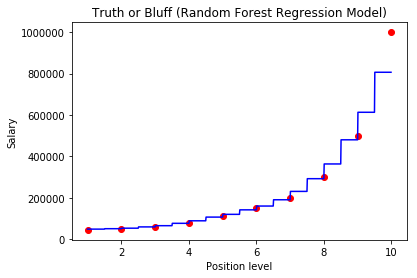

In [14]:
#increasing the number of trees
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0) #want 10 trees to start
regressor.fit(X, y)
# Predicting a new result
y_pred = regressor.predict(6.5)
print('y_pred: ' + str(y_pred))
# Visualising the Random Forest Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Woooo! we got nearly the right prediction! (b/c we wanted y_pred to be as close to 160k as possible)